# Load pkl
- NOTE: I was using a list to store back those numpy array.

In [1]:
import pickle
with open('kaggle/working/pkl/benign_list/benign_list.pkl', 'rb') as file: #NOTE: this depend on where you locate your pkl files
    loaded_img_list = pickle.load(file)
    
benign_list=[]
x = 0
while True:
  try:
    array_a_loaded = loaded_img_list[x]
    benign_list.append(array_a_loaded)
    x+=1
  except:
    print('end!')
    break
print(x)

end!
5368


In [2]:
import pickle
with open('kaggle/working/pkl/benign_list/cancer_list.pkl', 'rb') as file:
    loaded_img_list = pickle.load(file)
    
cancer_list=[]
x = 0
while True:
  try:
    array_a_loaded = loaded_img_list[x]
    cancer_list.append(array_a_loaded)
    x+=1
  except:
    print('end!')
    break
print(x)

end!
5432


In [3]:
import pickle
with open('kaggle/working/pkl/benign_list/normal_list.pkl', 'rb') as file:
    loaded_img_list = pickle.load(file)
    
normal_list=[]
x = 0
while True:
  try:
    array_a_loaded = loaded_img_list[x]
    normal_list.append(array_a_loaded)
    x+=1
  except:
    print('end!')
    break
print(x)

end!
4816


# Preview those image base on the array 

<class 'numpy.ndarray'>


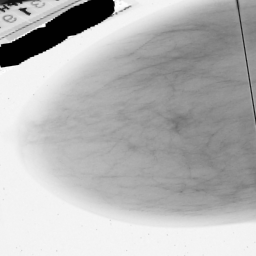

In [4]:
# using pillow
from PIL import Image
for np_array in normal_list:
    print(type(np_array))
    image = Image.fromarray(np_array)
    break
image # preview image

In [5]:
import numpy as np

normal_labels = np.zeros(len(normal_list))  # Label 0 for normal
cancer_labels = np.ones(len(cancer_list))   # Label 1 for cancer

X = np.array(normal_list + cancer_list)
y = np.concatenate([normal_labels, cancer_labels])


from sklearn.utils import shuffle
X, y = shuffle(X, y, random_state=42)


X = X.astype('float32') / 255.0


In [6]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [7]:
import tensorflow as tf
from tensorflow.keras import layers, models

model = models.Sequential()

model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=X_train.shape[1:]))
model.add(layers.MaxPooling2D((2, 2)))


model.add(layers.Flatten())


model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dropout(0.5))  
model.add(layers.Dense(1, activation='sigmoid')) 

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

test_loss, test_acc = model.evaluate(X_test, y_test)
print(f'Test accuracy: {test_acc}')



C:\Users\User\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


65/65 ━━━━━━━━━━━━━━━━━━━━ 8s 60ms/step - accuracy: 0.5307 - loss: 0.6938
Test accuracy: 0.5243902206420898


In [8]:

from tensorflow.keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(
    monitor='val_loss', 
    patience=3, 
    restore_best_weights=True
)


history = model.fit(X_train, y_train,epochs=50,validation_data=(X_test, y_test),batch_size=32, callbacks=[early_stopping])
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f'Test accuracy: {test_acc}')

from sklearn.metrics import classification_report


Epoch 1/50
257/257 ━━━━━━━━━━━━━━━━━━━━ 141s 536ms/step - accuracy: 0.5900 - loss: 5.2045 - val_accuracy: 0.6649 - val_loss: 0.5913
Epoch 2/50
257/257 ━━━━━━━━━━━━━━━━━━━━ 120s 467ms/step - accuracy: 0.6996 - loss: 0.5505 - val_accuracy: 0.7083 - val_loss: 0.5204
Epoch 3/50
257/257 ━━━━━━━━━━━━━━━━━━━━ 119s 462ms/step - accuracy: 0.7212 - loss: 0.5010 - val_accuracy: 0.7390 - val_loss: 0.5012
Epoch 4/50
257/257 ━━━━━━━━━━━━━━━━━━━━ 119s 462ms/step - accuracy: 0.7560 - loss: 0.4765 - val_accuracy: 0.7488 - val_loss: 0.4745
Epoch 5/50
257/257 ━━━━━━━━━━━━━━━━━━━━ 118s 461ms/step - accuracy: 0.7880 - loss: 0.4304 - val_accuracy: 0.7376 - val_loss: 0.4861
Epoch 6/50
257/257 ━━━━━━━━━━━━━━━━━━━━ 119s 464ms/step - accuracy: 0.8133 - loss: 0.4039 - val_accuracy: 0.7527 - val_loss: 0.4679
Epoch 7/50
257/257 ━━━━━━━━━━━━━━━━━━━━ 119s 462ms/step - accuracy: 0.8445 - loss: 0.3592 - val_accuracy: 0.7766 - val_loss: 0.4814
Epoch 8/50
257/257 ━━━━━━━━━━━━━━━━━━━━ 120s 466ms/step - accuracy: 0.8697 -

In [9]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 254, 254, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 127, 127, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 516128)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │    66,064,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 198,196,613 (756.06 MB)

 Trainable params: 66,065,537 (252.02 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 132,131,076 (504.04 MB)

In [10]:

y_pred = (model.predict(X_test) > 0.5).astype("int32")

print(classification_report(y_test, y_pred, target_names=['Normal', 'Cancer']))


65/65 ━━━━━━━━━━━━━━━━━━━━ 4s 66ms/step
              precision    recall  f1-score   support

      Normal       0.73      0.76      0.74       976
      Cancer       0.77      0.75      0.76      1074

    accuracy                           0.75      2050
   macro avg       0.75      0.75      0.75      2050
weighted avg       0.75      0.75      0.75      2050



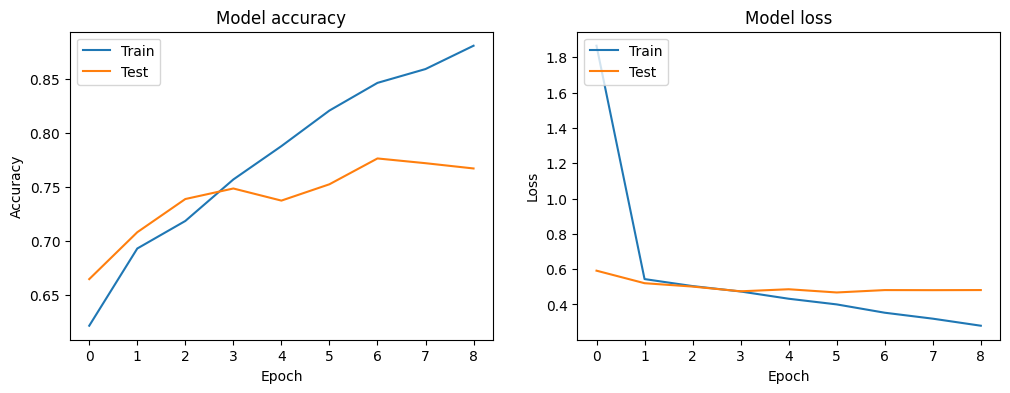

In [11]:

import matplotlib.pyplot as plt

plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')

plt.show()


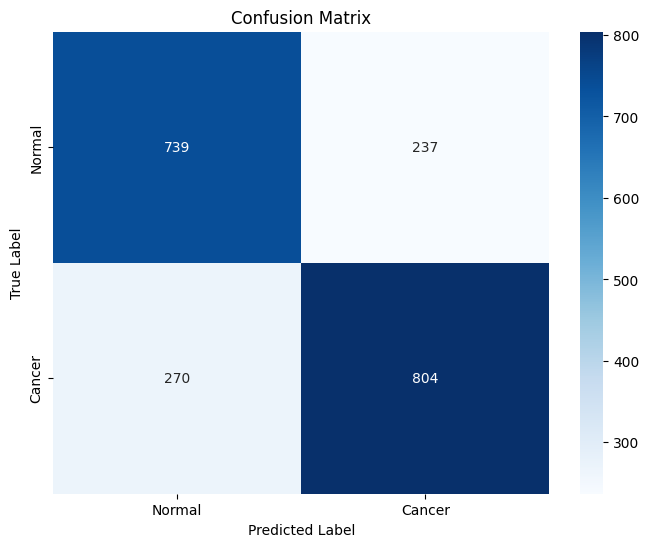

In [12]:

from sklearn.metrics import confusion_matrix
import seaborn as sns

conf_matrix = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Normal', 'Cancer'], yticklabels=['Normal', 'Cancer'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()


2nd

In [13]:
import tensorflow as tf
from tensorflow.keras import layers, models

model = models.Sequential()

model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=X_train.shape[1:]))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Flatten())

model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dropout(0.5))  
model.add(layers.Dense(1, activation='sigmoid')) 

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

test_loss, test_acc = model.evaluate(X_test, y_test)
print(f'Test accuracy: {test_acc}')



C:\Users\User\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


65/65 ━━━━━━━━━━━━━━━━━━━━ 6s 88ms/step - accuracy: 0.4905 - loss: 0.7040
Test accuracy: 0.49414634704589844


In [14]:

from tensorflow.keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(
    monitor='val_loss', 
    patience=3, 
    restore_best_weights=True
)

history = model.fit(X_train, y_train,epochs=50,validation_data=(X_test, y_test),batch_size=32, callbacks=[early_stopping])
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f'Test accuracy: {test_acc}')


Epoch 1/50
257/257 ━━━━━━━━━━━━━━━━━━━━ 125s 481ms/step - accuracy: 0.6093 - loss: 1.8667 - val_accuracy: 0.7161 - val_loss: 0.5362
Epoch 2/50
257/257 ━━━━━━━━━━━━━━━━━━━━ 122s 475ms/step - accuracy: 0.7606 - loss: 0.4729 - val_accuracy: 0.7468 - val_loss: 0.4738
Epoch 3/50
257/257 ━━━━━━━━━━━━━━━━━━━━ 123s 477ms/step - accuracy: 0.8156 - loss: 0.3847 - val_accuracy: 0.7624 - val_loss: 0.4861
Epoch 4/50
257/257 ━━━━━━━━━━━━━━━━━━━━ 122s 474ms/step - accuracy: 0.8624 - loss: 0.3008 - val_accuracy: 0.7634 - val_loss: 0.4843
Epoch 5/50
257/257 ━━━━━━━━━━━━━━━━━━━━ 122s 475ms/step - accuracy: 0.8910 - loss: 0.2529 - val_accuracy: 0.7610 - val_loss: 0.5385
65/65 ━━━━━━━━━━━━━━━━━━━━ 5s 83ms/step - accuracy: 0.7383 - loss: 0.4935
Test accuracy: 0.7468292713165283


In [15]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_1 (Conv2D)               │ (None, 254, 254, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 127, 127, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 125, 125, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 62, 62, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 246016)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │    31,490,176 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 94,529,093 (360.60 MB)

 Trainable params: 31,509,697 (120.20 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 63,019,396 (240.40 MB)

In [16]:

from sklearn.metrics import classification_report

y_pred = (model.predict(X_test) > 0.5).astype("int32")

print(classification_report(y_test, y_pred, target_names=['Normal', 'Cancer']))


65/65 ━━━━━━━━━━━━━━━━━━━━ 5s 83ms/step
              precision    recall  f1-score   support

      Normal       0.77      0.67      0.72       976
      Cancer       0.73      0.82      0.77      1074

    accuracy                           0.75      2050
   macro avg       0.75      0.74      0.74      2050
weighted avg       0.75      0.75      0.75      2050



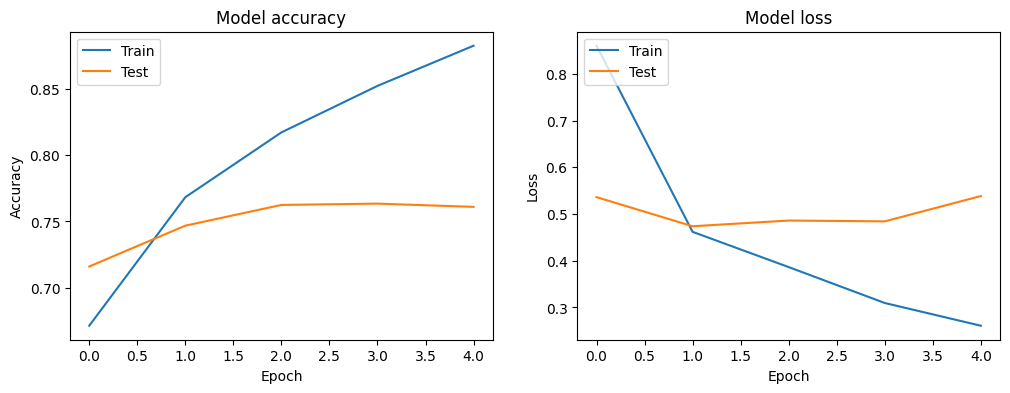

In [17]:

import matplotlib.pyplot as plt

plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')

plt.show()


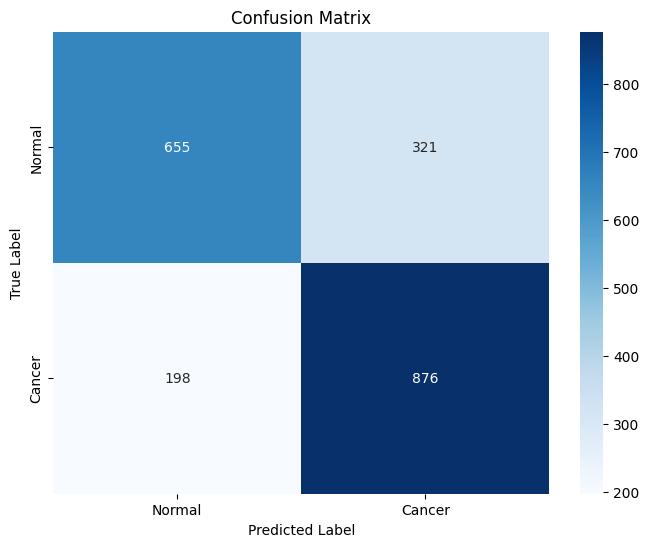

In [18]:

from sklearn.metrics import confusion_matrix
import seaborn as sns

conf_matrix = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Normal', 'Cancer'], yticklabels=['Normal', 'Cancer'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()


3rd

In [19]:
import tensorflow as tf
from tensorflow.keras import layers, models

model = models.Sequential()

model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=X_train.shape[1:]))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Flatten())

model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dropout(0.5))  
model.add(layers.Dense(1, activation='sigmoid')) 

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

test_loss, test_acc = model.evaluate(X_test, y_test)
print(f'Test accuracy: {test_acc}')



C:\Users\User\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


65/65 ━━━━━━━━━━━━━━━━━━━━ 7s 112ms/step - accuracy: 0.4739 - loss: 0.6964
Test accuracy: 0.47609755396842957


In [20]:
from tensorflow.keras.callbacks import EarlyStopping

In [21]:
early_stopping = EarlyStopping(
    monitor='val_loss', 
    patience=3, 
    restore_best_weights=True
)

history = model.fit(X_train, y_train,epochs=50,validation_data=(X_test, y_test),batch_size=32, callbacks=[early_stopping])

Epoch 1/50
257/257 ━━━━━━━━━━━━━━━━━━━━ 138s 533ms/step - accuracy: 0.6506 - loss: 0.6273 - val_accuracy: 0.7302 - val_loss: 0.5076
Epoch 2/50
257/257 ━━━━━━━━━━━━━━━━━━━━ 135s 525ms/step - accuracy: 0.7473 - loss: 0.4754 - val_accuracy: 0.7839 - val_loss: 0.4325
Epoch 3/50
257/257 ━━━━━━━━━━━━━━━━━━━━ 135s 524ms/step - accuracy: 0.7979 - loss: 0.3956 - val_accuracy: 0.7937 - val_loss: 0.4033
Epoch 4/50
257/257 ━━━━━━━━━━━━━━━━━━━━ 135s 524ms/step - accuracy: 0.8360 - loss: 0.3446 - val_accuracy: 0.8015 - val_loss: 0.4027
Epoch 5/50
257/257 ━━━━━━━━━━━━━━━━━━━━ 140s 544ms/step - accuracy: 0.8514 - loss: 0.3061 - val_accuracy: 0.7873 - val_loss: 0.4224
Epoch 6/50
257/257 ━━━━━━━━━━━━━━━━━━━━ 136s 531ms/step - accuracy: 0.8687 - loss: 0.2782 - val_accuracy: 0.8049 - val_loss: 0.4248
Epoch 7/50
257/257 ━━━━━━━━━━━━━━━━━━━━ 137s 532ms/step - accuracy: 0.8870 - loss: 0.2536 - val_accuracy: 0.7995 - val_loss: 0.4878


In [22]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)               │ (None, 254, 254, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 127, 127, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 125, 125, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 62, 62, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 60, 60, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 30, 30, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 115200)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 128)            │    14,745,728 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 44,517,317 (169.82 MB)

 Trainable params: 14,839,105 (56.61 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 29,678,212 (113.21 MB)

In [23]:
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f'Test accuracy: {test_acc}')


65/65 ━━━━━━━━━━━━━━━━━━━━ 7s 112ms/step - accuracy: 0.7963 - loss: 0.4035
Test accuracy: 0.8014634251594543


In [24]:
from sklearn.metrics import classification_report

y_pred = (model.predict(X_test) > 0.5).astype("int32")

print(classification_report(y_test, y_pred, target_names=['Normal', 'Cancer']))


65/65 ━━━━━━━━━━━━━━━━━━━━ 7s 111ms/step
              precision    recall  f1-score   support

      Normal       0.83      0.73      0.78       976
      Cancer       0.78      0.86      0.82      1074

    accuracy                           0.80      2050
   macro avg       0.81      0.80      0.80      2050
weighted avg       0.80      0.80      0.80      2050



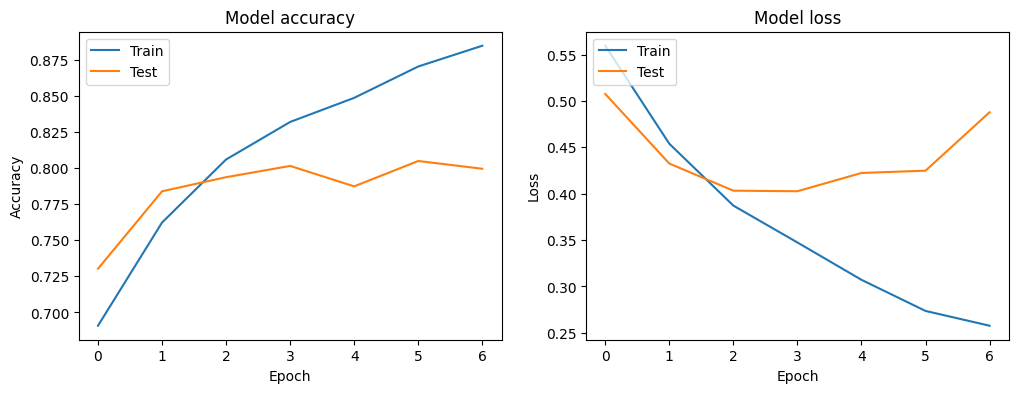

In [25]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')

plt.show()


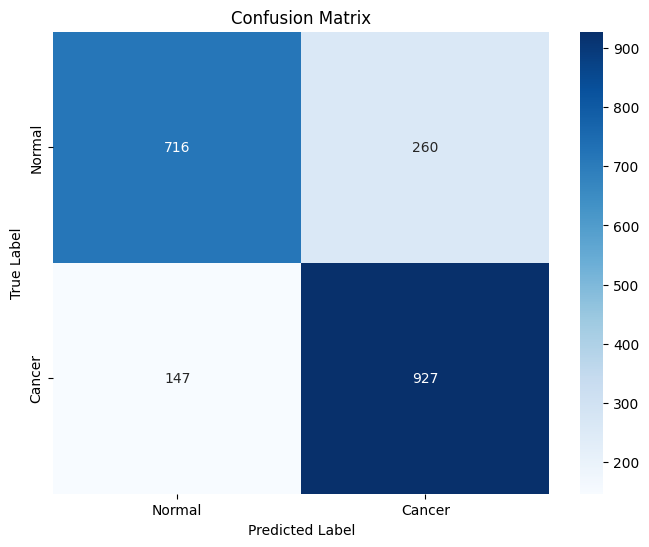

In [26]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

conf_matrix = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Normal', 'Cancer'], yticklabels=['Normal', 'Cancer'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()


In [14]:
model.save('cnn_model_before_tuning.keras')


In [15]:
import tensorflow as tf
from tensorflow.keras import layers, models
from keras_tuner import HyperModel

def build_model(hp):
    model = models.Sequential()
    
    model.add(layers.Conv2D(
        filters=hp.Int('conv_1_filter', min_value=32, max_value=128, step=16),
        kernel_size=(3, 3),
        activation='relu',
        input_shape=X_train.shape[1:]
    ))
    model.add(layers.MaxPooling2D((2, 2)))

    model.add(layers.Conv2D(
        filters=hp.Int('conv_2_filter', min_value=32, max_value=128, step=16),
        kernel_size=(3, 3),
        activation='relu'
    ))
    model.add(layers.MaxPooling2D((2, 2)))

    model.add(layers.Conv2D(
        filters=hp.Int('conv_3_filter', min_value=32, max_value=128, step=16),
        kernel_size=(3, 3),
        activation='relu'
    ))
    model.add(layers.MaxPooling2D((2, 2)))

    model.add(layers.Flatten())

    model.add(layers.Dense(
        units=hp.Int('dense_units', min_value=64, max_value=256, step=32),
        activation='relu'
    ))
    
    model.add(layers.Dropout(hp.Float('dropout_rate', min_value=0.2, max_value=0.5, step=0.1)))
    
    model.add(layers.Dense(1, activation='sigmoid'))
    
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    
    return model


In [16]:
from keras_tuner import RandomSearch

tuner = RandomSearch(
    build_model,
    objective='val_accuracy',
    max_trials=10, 
    executions_per_trial=2,  
    directory='my_dir',
    project_name='cnn_tuning'
)


C:\Users\User\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [17]:
from tensorflow.keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(
    monitor='val_loss', 
    patience=3, 
    restore_best_weights=True
)


In [18]:
tuner.search(
    X_train, y_train, 
    epochs=50,  # Use a high number of epochs; EarlyStopping will stop training early
    validation_data=(X_test, y_test),
    callbacks=[early_stopping],
    batch_size=32
)


Trial 10 Complete [01h 09m 18s]
val_accuracy: 0.7912195324897766

Best val_accuracy So Far: 0.8041463494300842
Total elapsed time: 08h 25m 33s


In [19]:
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]

print(f"""
The optimal number of filters in the first convolutional layer is {best_hps.get('conv_1_filter')}.
The optimal number of filters in the second convolutional layer is {best_hps.get('conv_2_filter')}.
The optimal number of filters in the third convolutional layer is {best_hps.get('conv_3_filter')}.
The optimal number of units in the dense layer is {best_hps.get('dense_units')}.
The optimal dropout rate is {best_hps.get('dropout_rate')}.
""")



The optimal number of filters in the first convolutional layer is 96.
The optimal number of filters in the second convolutional layer is 32.
The optimal number of filters in the third convolutional layer is 80.
The optimal number of units in the dense layer is 192.
The optimal dropout rate is 0.4.



In [20]:
model = tuner.hypermodel.build(best_hps)
history = model.fit(
    X_train, y_train, 
    epochs=50,  
    validation_data=(X_test, y_test),
    callbacks=[early_stopping],
    batch_size=32
)


Epoch 1/50
257/257 ━━━━━━━━━━━━━━━━━━━━ 187s 722ms/step - accuracy: 0.6222 - loss: 0.7083 - val_accuracy: 0.7190 - val_loss: 0.5089
Epoch 2/50
257/257 ━━━━━━━━━━━━━━━━━━━━ 184s 717ms/step - accuracy: 0.7585 - loss: 0.4652 - val_accuracy: 0.7868 - val_loss: 0.4224
Epoch 3/50
257/257 ━━━━━━━━━━━━━━━━━━━━ 182s 707ms/step - accuracy: 0.7910 - loss: 0.3960 - val_accuracy: 0.7863 - val_loss: 0.4161
Epoch 4/50
257/257 ━━━━━━━━━━━━━━━━━━━━ 182s 709ms/step - accuracy: 0.8288 - loss: 0.3496 - val_accuracy: 0.8044 - val_loss: 0.3993
Epoch 5/50
257/257 ━━━━━━━━━━━━━━━━━━━━ 183s 713ms/step - accuracy: 0.8335 - loss: 0.3274 - val_accuracy: 0.8132 - val_loss: 0.4269
Epoch 6/50
257/257 ━━━━━━━━━━━━━━━━━━━━ 182s 707ms/step - accuracy: 0.8499 - loss: 0.3062 - val_accuracy: 0.8083 - val_loss: 0.4309
Epoch 7/50
257/257 ━━━━━━━━━━━━━━━━━━━━ 181s 706ms/step - accuracy: 0.8615 - loss: 0.2799 - val_accuracy: 0.8015 - val_loss: 0.4186


In [21]:
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f'Test accuracy: {test_acc}')


65/65 ━━━━━━━━━━━━━━━━━━━━ 11s 163ms/step - accuracy: 0.8047 - loss: 0.4050
Test accuracy: 0.8043902516365051


In [22]:
y_pred = (model.predict(X_test) > 0.5).astype("int32")

print(classification_report(y_test, y_pred, target_names=['Normal', 'Cancer']))


65/65 ━━━━━━━━━━━━━━━━━━━━ 11s 164ms/step
              precision    recall  f1-score   support

      Normal       0.86      0.70      0.77       976
      Cancer       0.77      0.90      0.83      1074

    accuracy                           0.80      2050
   macro avg       0.81      0.80      0.80      2050
weighted avg       0.81      0.80      0.80      2050



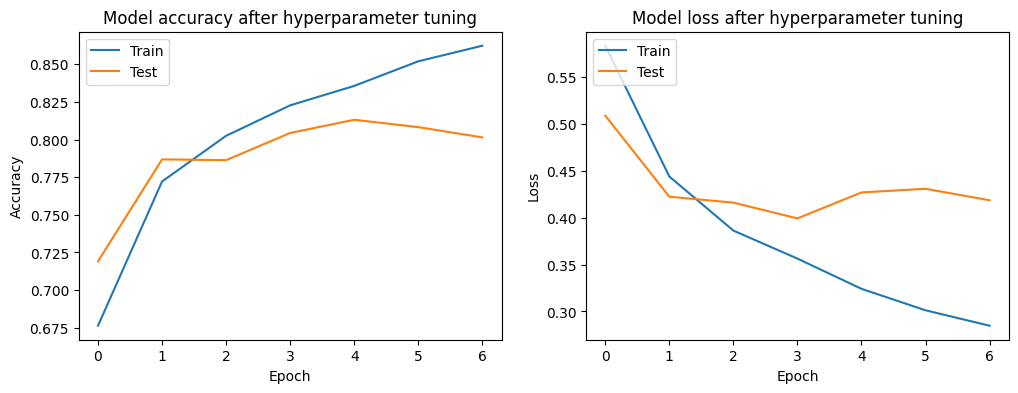

In [23]:
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy after hyperparameter tuning')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss after hyperparameter tuning')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')

plt.show()


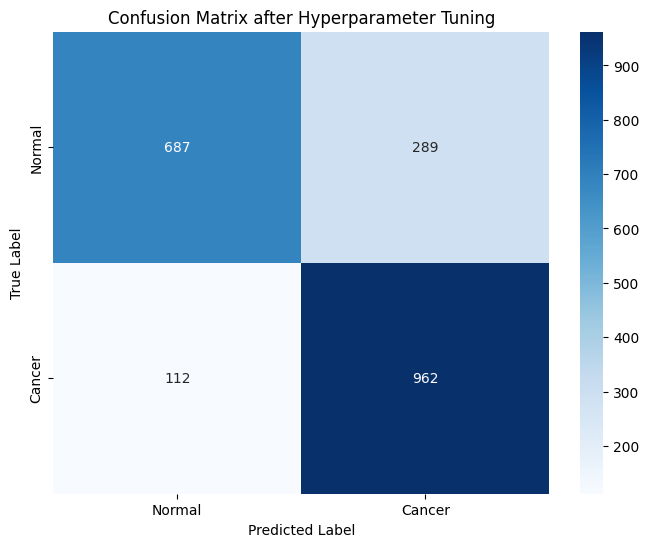

In [24]:
conf_matrix = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Normal', 'Cancer'], yticklabels=['Normal', 'Cancer'])
plt.title('Confusion Matrix after Hyperparameter Tuning')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()


In [25]:
model.save('cnn_model_after_tuning.keras')


In [39]:
from keras_tuner import GridSearch
from tensorflow.keras import layers, models, optimizers

def build_model(hp):
    model = models.Sequential()
    
    model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=X_train.shape[1:]))
    model.add(layers.MaxPooling2D((2, 2)))

    model.add(layers.Conv2D(64, (3, 3), activation='relu'))
    model.add(layers.MaxPooling2D((2, 2)))

    model.add(layers.Conv2D(128, (3, 3), activation='relu'))
    model.add(layers.MaxPooling2D((2, 2)))

    model.add(layers.Flatten())

    model.add(layers.Dense(
        units=hp.Choice('dense_units', values=[64, 128, 256]),
        activation='relu'
    ))
    
    model.add(layers.Dropout(
        rate=hp.Choice('dropout_rate', values=[0.2, 0.3, 0.4])
    ))

    model.add(layers.Dense(1, activation='sigmoid'))
    
    learning_rate = hp.Choice('learning_rate', values=[1e-4, 1e-3, 1e-2])
    model.compile(optimizer=optimizers.Adam(learning_rate=learning_rate),
                  loss='binary_crossentropy',
                  metrics=['accuracy'])
    
    return model


In [46]:

tuner = GridSearch(
    build_model,
    objective='val_accuracy',
    max_trials=27,  # 3 (dense_units) * 3 (dropout_rate) * 3 (learning_rate) = 27 combinations
    directory='my_dir',
    project_name='grid_search'
)

from tensorflow.keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(
    monitor='val_loss', 
    patience=3, 
    restore_best_weights=True
)

tuner.search(
    X_train, y_train, 
    epochs=50, 
    validation_data=(X_test, y_test),
    callbacks=[early_stopping],
    batch_size=32
)

best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]
model = tuner.hypermodel.build(best_hps)
history = model.fit(
    X_train, y_train, 
    epochs=50,  
    validation_data=(X_test, y_test),
    callbacks=[early_stopping],
    batch_size=32
)


Trial 27 Complete [00h 12m 27s]
val_accuracy: 0.523902416229248

Best val_accuracy So Far: 0.8141463398933411
Total elapsed time: 07h 10m 35s
Epoch 1/50
257/257 ━━━━━━━━━━━━━━━━━━━━ 150s 579ms/step - accuracy: 0.6593 - loss: 0.9155 - val_accuracy: 0.7444 - val_loss: 0.4901
Epoch 2/50
257/257 ━━━━━━━━━━━━━━━━━━━━ 148s 576ms/step - accuracy: 0.7714 - loss: 0.4281 - val_accuracy: 0.7785 - val_loss: 0.4265
Epoch 3/50
257/257 ━━━━━━━━━━━━━━━━━━━━ 151s 588ms/step - accuracy: 0.8290 - loss: 0.3545 - val_accuracy: 0.7995 - val_loss: 0.4222
Epoch 4/50
257/257 ━━━━━━━━━━━━━━━━━━━━ 151s 586ms/step - accuracy: 0.8437 - loss: 0.3138 - val_accuracy: 0.7966 - val_loss: 0.4542
Epoch 5/50
257/257 ━━━━━━━━━━━━━━━━━━━━ 144s 560ms/step - accuracy: 0.8788 - loss: 0.2614 - val_accuracy: 0.7927 - val_loss: 0.5118
Epoch 6/50
257/257 ━━━━━━━━━━━━━━━━━━━━ 142s 554ms/step - accuracy: 0.9029 - loss: 0.2227 - val_accuracy: 0.8073 - val_loss: 0.4735


In [47]:

best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]

print(f"""
The optimal number of units in the dense layer is {best_hps.get('dense_units')}.
The optimal dropout rate is {best_hps.get('dropout_rate')}.
The optimal learning rate is {best_hps.get('learning_rate')}.
""")



The optimal number of units in the dense layer is 256.
The optimal dropout rate is 0.2.
The optimal learning rate is 0.001.



In [71]:
import tensorflow as tf
from tensorflow.keras import layers, models, optimizers

model = models.Sequential()

model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=X_train.shape[1:]))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Flatten())

model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dropout(0.2))  
model.add(layers.Dense(1, activation='sigmoid')) 

optimizer = optimizers.Adam(learning_rate=0.001)  
model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

early_stopping = EarlyStopping(
    monitor='val_loss', 
    patience=5, 
    restore_best_weights=True
)

# Train the model with EarlyStopping
history = model.fit(X_train, y_train,epochs=50,validation_data=(X_test, y_test),batch_size=32, callbacks=[early_stopping])



C:\Users\User\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
257/257 ━━━━━━━━━━━━━━━━━━━━ 155s 598ms/step - accuracy: 0.6558 - loss: 0.8342 - val_accuracy: 0.7268 - val_loss: 0.4989
Epoch 2/50
257/257 ━━━━━━━━━━━━━━━━━━━━ 151s 588ms/step - accuracy: 0.7675 - loss: 0.4543 - val_accuracy: 0.7649 - val_loss: 0.4628
Epoch 3/50
257/257 ━━━━━━━━━━━━━━━━━━━━ 151s 589ms/step - accuracy: 0.8213 - loss: 0.3690 - val_accuracy: 0.7937 - val_loss: 0.4195
Epoch 4/50
257/257 ━━━━━━━━━━━━━━━━━━━━ 149s 579ms/step - accuracy: 0.8489 - loss: 0.3107 - val_accuracy: 0.8015 - val_loss: 0.4200
Epoch 5/50
257/257 ━━━━━━━━━━━━━━━━━━━━ 149s 579ms/step - accuracy: 0.8850 - loss: 0.2551 - val_accuracy: 0.8034 - val_loss: 0.4442
Epoch 6/50
257/257 ━━━━━━━━━━━━━━━━━━━━ 154s 597ms/step - accuracy: 0.9068 - loss: 0.2205 - val_accuracy: 0.7800 - val_loss: 0.4989
Epoch 7/50
257/257 ━━━━━━━━━━━━━━━━━━━━ 150s 583ms/step - accuracy: 0.9228 - loss: 0.1716 - val_accuracy: 0.7898 - val_loss: 0.6811
Epoch 8/50
257/257 ━━━━━━━━━━━━━━━━━━━━ 148s 576ms/step - accuracy: 0.9406 -

In [72]:
# Evaluate the model
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f'Test accuracy: {test_acc}')

65/65 ━━━━━━━━━━━━━━━━━━━━ 7s 113ms/step - accuracy: 0.7865 - loss: 0.4404
Test accuracy: 0.7936585545539856


In [73]:
# Save the model in .keras format
model.save('gridsearchmanualbuild_cnn.keras')


In [74]:

from sklearn.metrics import classification_report

# Predict on the test set
y_pred = model.predict(X_test)
y_pred_classes = (y_pred > 0.5).astype("int32")  # Convert probabilities to binary values

# Generate the classification report
report = classification_report(y_test, y_pred_classes)
print(report)

import matplotlib.pyplot as plt


65/65 ━━━━━━━━━━━━━━━━━━━━ 7s 111ms/step
              precision    recall  f1-score   support

         0.0       0.85      0.68      0.76       976
         1.0       0.76      0.89      0.82      1074

    accuracy                           0.79      2050
   macro avg       0.81      0.79      0.79      2050
weighted avg       0.80      0.79      0.79      2050



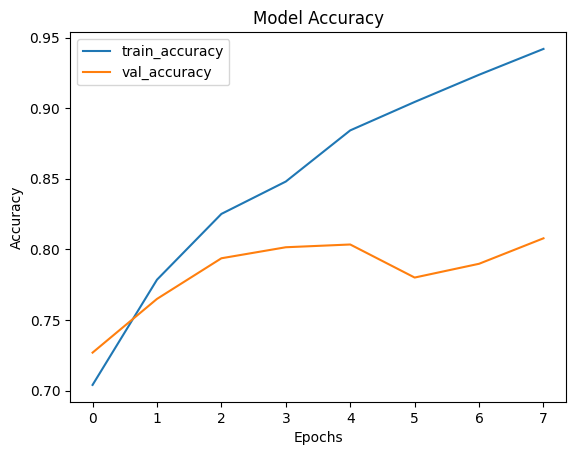

In [75]:

# Plot accuracy
plt.plot(history.history['accuracy'], label='train_accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


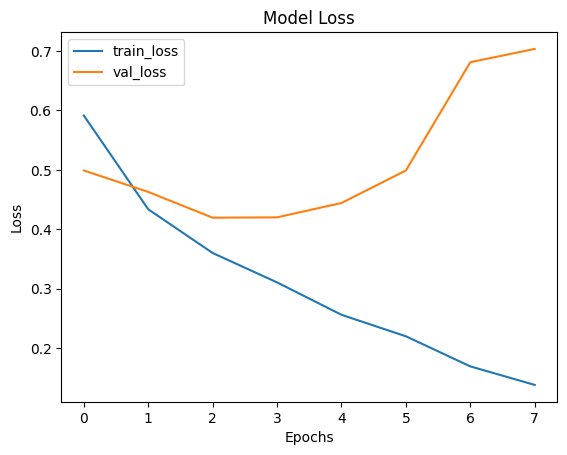

In [76]:

# Plot loss
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


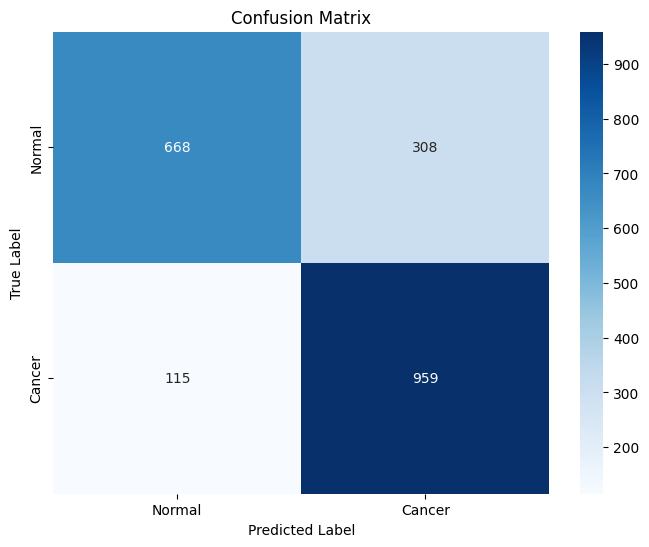

In [77]:

from sklearn.metrics import confusion_matrix
import seaborn as sns

# Generate the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_classes)

# Plot the confusion matrix using seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Normal', 'Cancer'], yticklabels=['Normal', 'Cancer'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()


In [82]:
import tensorflow as tf

# Load the saved model
loaded_model = tf.keras.models.load_model('cnn_model_before_tuning.keras')

In [83]:
loaded_model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 254, 254, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 127, 127, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 125, 125, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 62, 62, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 60, 60, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 30, 30, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 115200)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │    14,745,728 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 44,517,317 (169.82 MB)

 Trainable params: 14,839,105 (56.61 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 29,678,212 (113.21 MB)